# Import Required Libraries
Import the necessary libraries, including NumPy, pandas, scikit-learn, and matplotlib.

In [13]:

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Load and Preprocess Data
Load the dataset and preprocess it as needed, including handling missing values and scaling features.

In [14]:

data = pd.read_csv('/home/code_wizard/coding_files/code_challenges/k_means clustering and db scan/NFHS4DM.csv')  


data.head()


data.fillna(data.mean(), inplace=True)


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Convert scaled data back to a DataFrame
scaled_data = pd.DataFrame(scaled_data, columns=data.columns)

# Display the first few rows of the scaled dataset
scaled_data.head()

,Current.age,Sex,Currently.has.asthma,Currently.has.thyroid.disorder,Currently.has.heart.disease,Currently.has.cancer,Suffers.from.TB,First.SYSTOLIC.reading,First.DIASTOLIC.reading,Currently.taking.a.prescribed.medicine.to.lower.BP,...,Type.of.caste.or.tribe.of.the.household.head,Has.refrigerator,Has.bicycle,Has.motorcycle.scooter,Has.car.truck,Type.of.cooking.fuel,Household.structure,Owns.livestock..herds.or.farm.animals,Source.of.drinking.water,Time.to.get.to.water.source..minutes.
0,0.200665,0.472827,-0.372032,-0.341955,-0.343215,-0.223815,-0.069736,-0.498657,-0.202001,-0.399576,...,-0.203833,1.035289,-1.061229,-1.034061,-0.372204,1.847893,-1.073936,-0.811633,0.709681,-0.385952
1,-0.138070,0.472827,-0.372032,-0.341955,-0.343215,-0.223815,-0.069736,0.599965,0.454926,2.502653,...,1.375812,1.035289,-1.061229,0.967061,-0.372204,0.784225,-1.073936,1.232084,0.709681,-0.385952
2,0.878136,0.472827,-0.372032,-0.341955,-0.343215,-0.223815,-0.069736,-0.132449,0.454926,-0.399576,...,-0.993655,1.035289,0.942303,0.967061,2.686698,0.784225,-1.073936,-0.811633,0.709681,-0.385952
3,1.103960,0.472827,-0.372032,-0.341955,-0.343215,-0.223815,-0.069736,0.599965,0.290694,2.502653,...,-0.203833,1.035289,-1.061229,0.967061,2.686698,0.784225,-1.073936,-0.811633,0.709681,-0.385952
4,-1.493012,0.472827,-0.372032,-0.341955,-0.343215,-0.223815,-0.069736,-0.760233,-1.269508,-0.399576,...,-0.203833,1.035289,-1.061229,0.967061,2.686698,-1.343110,-1.073936,-0.811633,0.709681,-0.385952


# Apply k-Means Clustering
Use scikit-learn's KMeans to apply k-Means clustering to the data.

In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto")
clusters_kmeans=kmeans.fit_predict((data-data.mean())/data.std())
(values_kmeans,counts_kmeans) = np.unique(clusters_kmeans,return_counts=True)

clusters_kmeans

array([2, 2, 2, ..., 2, 2, 0], dtype=int32)

# Plot Silhouette and Davies-Bouldin Scores for k-Means
Calculate the silhouette and Davies-Bouldin scores for different k values using k-Means clustering.

Silhouette Scores for different k values: [np.float64(0.2979006513287418), np.float64(0.08335700846858159), np.float64(0.08511418494712017), np.float64(0.06359013087744256), np.float64(0.05920847409696965), np.float64(0.05578608957358554), np.float64(0.06854599158969583), np.float64(0.05616007345983939), np.float64(0.053002702299119464)]
Davies-Bouldin Scores for different k values: [np.float64(2.551572317982304), np.float64(2.797363780492549), np.float64(2.5556455421526527), np.float64(2.778195160746035), np.float64(2.7708628123156505), np.float64(2.885491294838552), np.float64(2.469812342382589), np.float64(2.7073741451648496), np.float64(2.7410461196474456)]


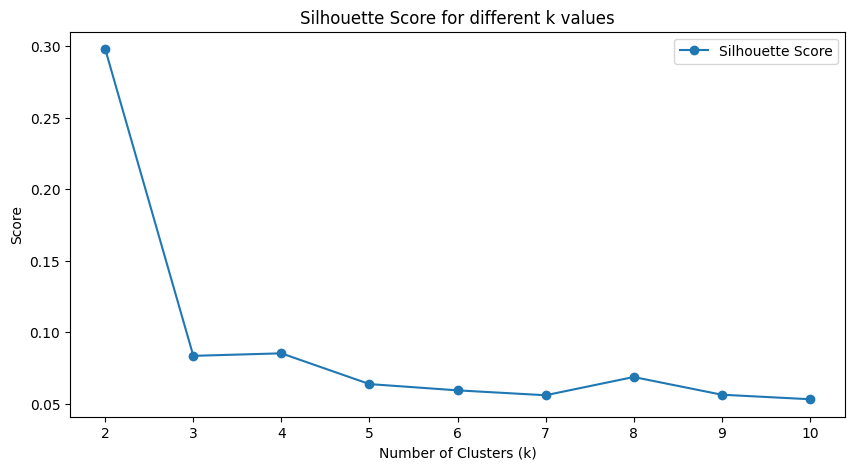

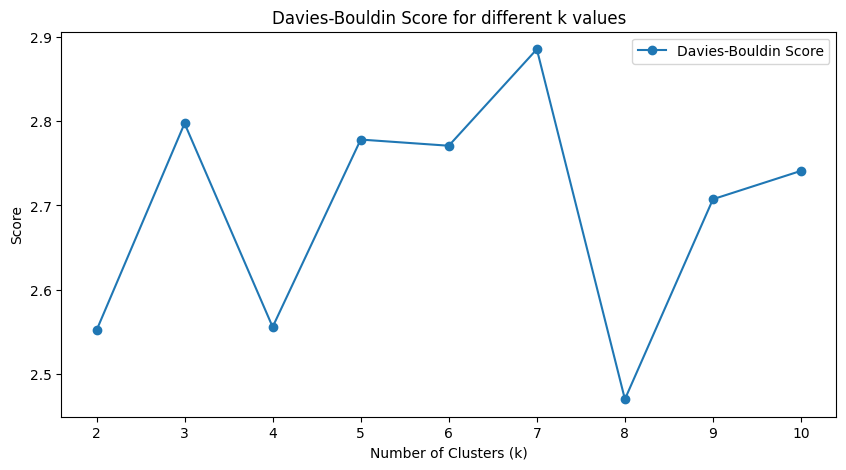

In [ ]:

k_values = range(2, 11)


silhouette_scores = []
davies_bouldin_scores = []


for k in k_values:
    
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    
    
    cluster_labels = kmeans.labels_
    
    # Calculate the silhouette score
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
    # Calculate the Davies-Bouldin score
    davies_bouldin_avg = davies_bouldin_score(scaled_data, cluster_labels)
    davies_bouldin_scores.append(davies_bouldin_avg)


print("Silhouette Scores for different k values:", silhouette_scores)
print("Davies-Bouldin Scores for different k values:", davies_bouldin_scores)


plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, marker='o', label='Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score')
plt.title('Silhouette Score for different k values')
plt.legend()
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(k_values, davies_bouldin_scores, marker='o', label='Davies-Bouldin Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score')
plt.title('Davies-Bouldin Score for different k values')
plt.legend()
plt.show()

# Apply DBSCAN Clustering
Use scikit-learn's DBSCAN to apply DBSCAN clustering to the data.

In [22]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=2, min_samples = 5)
clusters_dbscan=dbscan.fit_predict((data-data.mean())/data.std())
(values_dbscan,counts_dbscan) = np.unique(clusters_dbscan,return_counts=True)

clusters_dbscan

array([-1, -1, -1, ..., -1, -1, -1])

# Plot Silhouette and Davies-Bouldin Scores for DBSCAN


Silhouette Scores for different eps and min_samples values: [(np.float64(0.7000000000000001), 2, np.float64(-0.010374966122563325)), (np.float64(0.8), 2, np.float64(-0.010374966122563325)), (np.float64(0.9), 2, np.float64(-0.010374966122563325)), (np.float64(1.0), 2, np.float64(-0.010374966122563325))]
Davies-Bouldin Scores for different eps and min_samples values: [(np.float64(0.7000000000000001), 2, np.float64(1.0439238878117048)), (np.float64(0.8), 2, np.float64(1.0439238878117048)), (np.float64(0.9), 2, np.float64(1.0439238878117048)), (np.float64(1.0), 2, np.float64(1.0439238878117048))]
Best Silhouette Score: (np.float64(0.7000000000000001), 2, np.float64(-0.010374966122563325))
Best Davies-Bouldin Score: (np.float64(0.7000000000000001), 2, np.float64(1.0439238878117048))


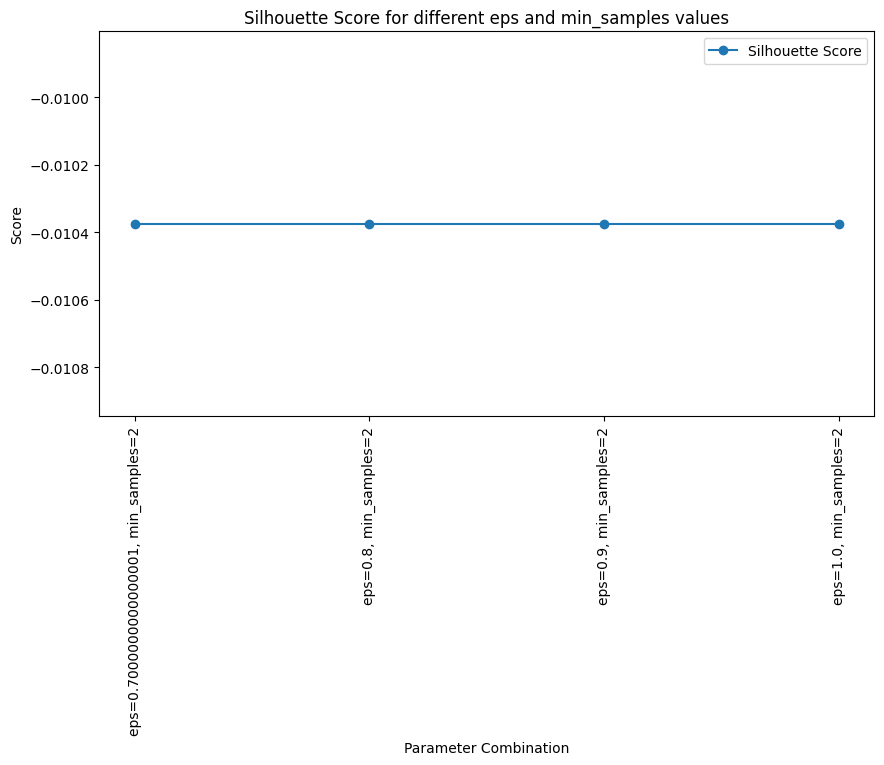

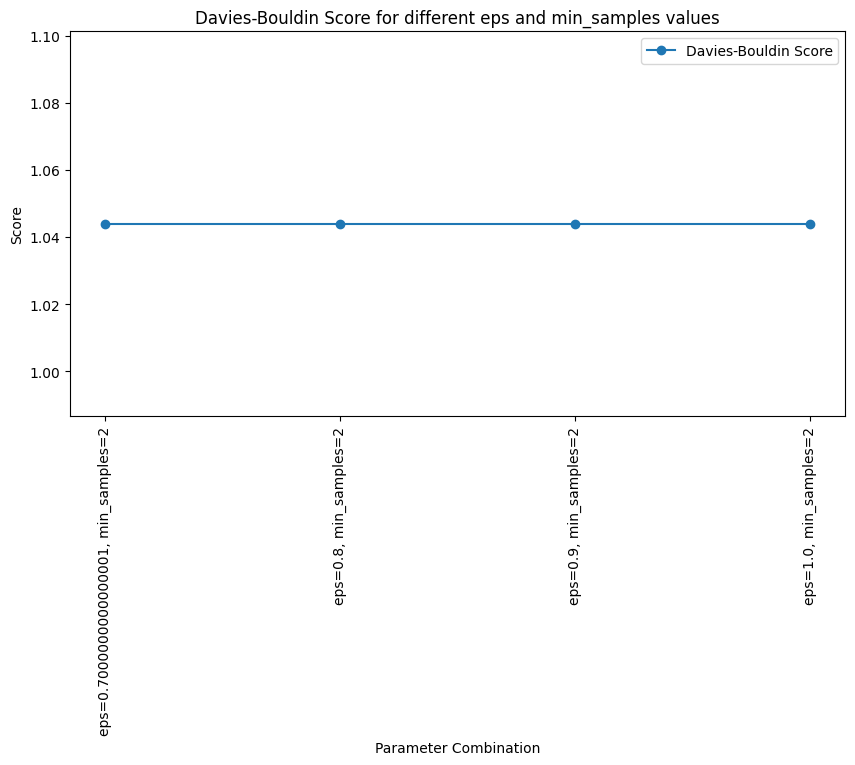

In [ ]:

eps_values = np.arange(0.1, 1.1, 0.1)
min_samples_values = range(2, 11)


silhouette_scores_dbscan = []
davies_bouldin_scores_dbscan = []


for eps in eps_values:
    for min_samples in min_samples_values:
       
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(scaled_data)
        
        
        cluster_labels = dbscan.labels_
        
        
        if len(set(cluster_labels)) > 1:
            
            silhouette_avg = silhouette_score(scaled_data, cluster_labels)
            silhouette_scores_dbscan.append((eps, min_samples, silhouette_avg))
            
            
            davies_bouldin_avg = davies_bouldin_score(scaled_data, cluster_labels)
            davies_bouldin_scores_dbscan.append((eps, min_samples, davies_bouldin_avg))


print("Silhouette Scores for different eps and min_samples values:", silhouette_scores_dbscan)
print("Davies-Bouldin Scores for different eps and min_samples values:", davies_bouldin_scores_dbscan)


best_silhouette_score = max(silhouette_scores_dbscan, key=lambda x: x[2])
print("Best Silhouette Score:", best_silhouette_score)


best_davies_bouldin_score = min(davies_bouldin_scores_dbscan, key=lambda x: x[2])
print("Best Davies-Bouldin Score:", best_davies_bouldin_score)

# Plot the silhouette scores
plt.figure(figsize=(10, 5))
plt.plot([f"eps={eps}, min_samples={min_samples}" for eps, min_samples, _ in silhouette_scores_dbscan], 
         [score for _, _, score in silhouette_scores_dbscan], marker='o', label='Silhouette Score')
plt.xlabel('Parameter Combination')
plt.ylabel('Score')
plt.title('Silhouette Score for different eps and min_samples values')
plt.xticks(rotation=90)
plt.legend()
plt.show()

# Plot the Davies-Bouldin scores
plt.figure(figsize=(10, 5))
plt.plot([f"eps={eps}, min_samples={min_samples}" for eps, min_samples, _ in davies_bouldin_scores_dbscan], 
         [score for _, _, score in davies_bouldin_scores_dbscan], marker='o', label='Davies-Bouldin Score')
plt.xlabel('Parameter Combination')
plt.ylabel('Score')
plt.title('Davies-Bouldin Score for different eps and min_samples values')
plt.xticks(rotation=90)
plt.legend()
plt.show()

# Grid Search for k-Means
Perform a grid search to find the optimal k value for k-Means clustering that produces the highest silhouette and Davies-Bouldin scores.

Silhouette Scores for different k values: [np.float64(0.2979006513287418), np.float64(0.08335700846858159), np.float64(0.08511418494712017), np.float64(0.06359013087744256), np.float64(0.05920847409696965), np.float64(0.05578608957358554), np.float64(0.06854599158969583), np.float64(0.05616007345983939), np.float64(0.053002702299119464)]
Davies-Bouldin Scores for different k values: [np.float64(2.551572317982304), np.float64(2.797363780492549), np.float64(2.5556455421526527), np.float64(2.778195160746035), np.float64(2.7708628123156505), np.float64(2.885491294838552), np.float64(2.469812342382589), np.float64(2.7073741451648496), np.float64(2.7410461196474456)]


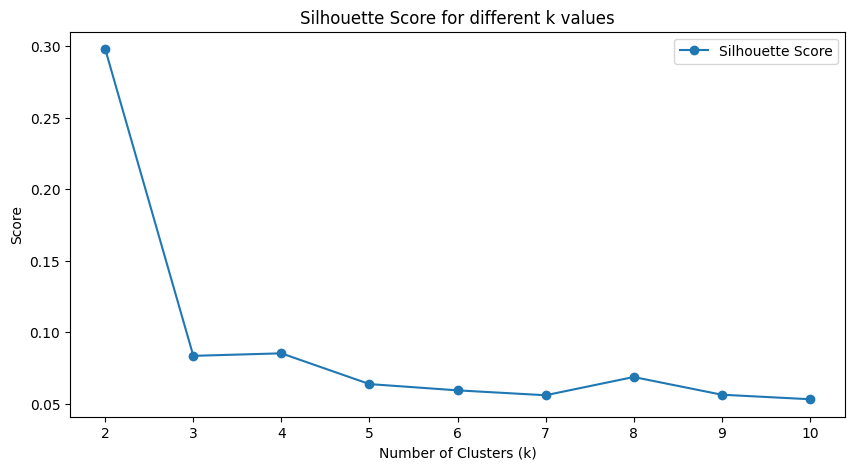

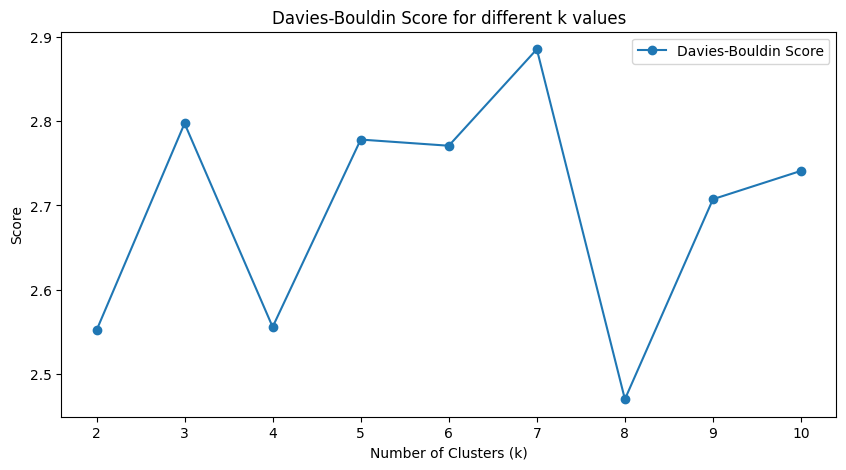

In [ ]:

k_values = range(2, 11)


silhouette_scores = []
davies_bouldin_scores = []


for k in k_values:
    
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    
    
    cluster_labels = kmeans.labels_
    
    
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
    
    davies_bouldin_avg = davies_bouldin_score(scaled_data, cluster_labels)
    davies_bouldin_scores.append(davies_bouldin_avg)

# Display the silhouette and Davies-Bouldin scores
print("Silhouette Scores for different k values:", silhouette_scores)
print("Davies-Bouldin Scores for different k values:", davies_bouldin_scores)

# Plot the silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, marker='o', label='Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score')
plt.title('Silhouette Score for different k values')
plt.legend()
plt.show()

# Plot the Davies-Bouldin scores
plt.figure(figsize=(10, 5))
plt.plot(k_values, davies_bouldin_scores, marker='o', label='Davies-Bouldin Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score')
plt.title('Davies-Bouldin Score for different k values')
plt.legend()
plt.show()

# Grid Search for DBSCAN
Perform a grid search to find the optimal eps and min_samples values for DBSCAN clustering that produce the highest silhouette and Davies-Bouldin scores.

Silhouette Scores for different eps and min_samples values: [(np.float64(0.7000000000000001), 2, np.float64(-0.010374966122563325)), (np.float64(0.8), 2, np.float64(-0.010374966122563325)), (np.float64(0.9), 2, np.float64(-0.010374966122563325)), (np.float64(1.0), 2, np.float64(-0.010374966122563325))]
Davies-Bouldin Scores for different eps and min_samples values: [(np.float64(0.7000000000000001), 2, np.float64(1.0439238878117048)), (np.float64(0.8), 2, np.float64(1.0439238878117048)), (np.float64(0.9), 2, np.float64(1.0439238878117048)), (np.float64(1.0), 2, np.float64(1.0439238878117048))]
Best Silhouette Score: (np.float64(0.7000000000000001), 2, np.float64(-0.010374966122563325))
Best Davies-Bouldin Score: (np.float64(0.7000000000000001), 2, np.float64(1.0439238878117048))


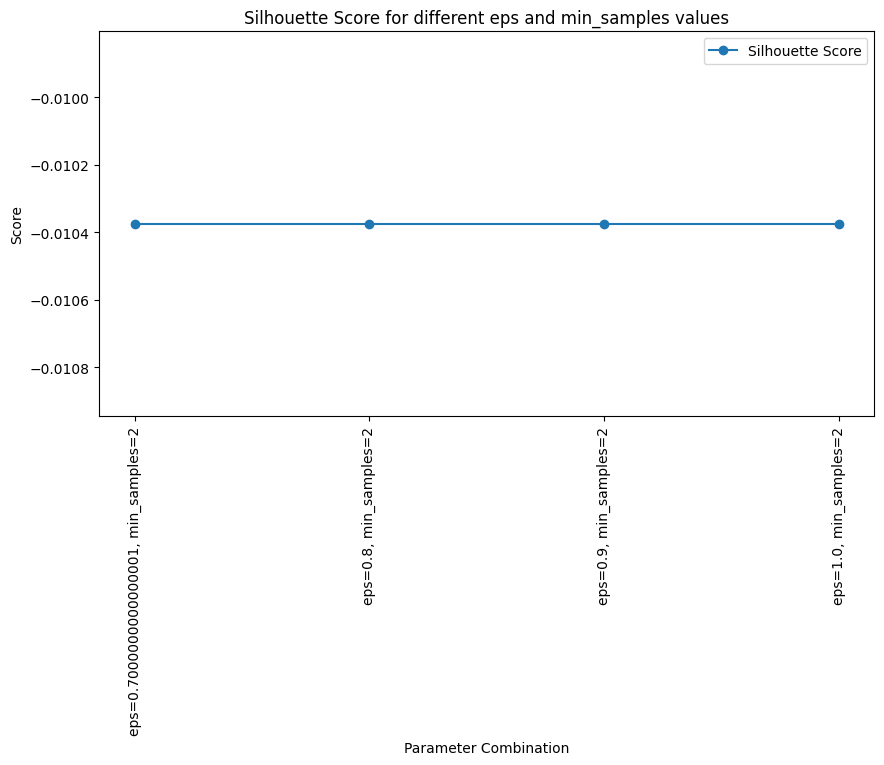

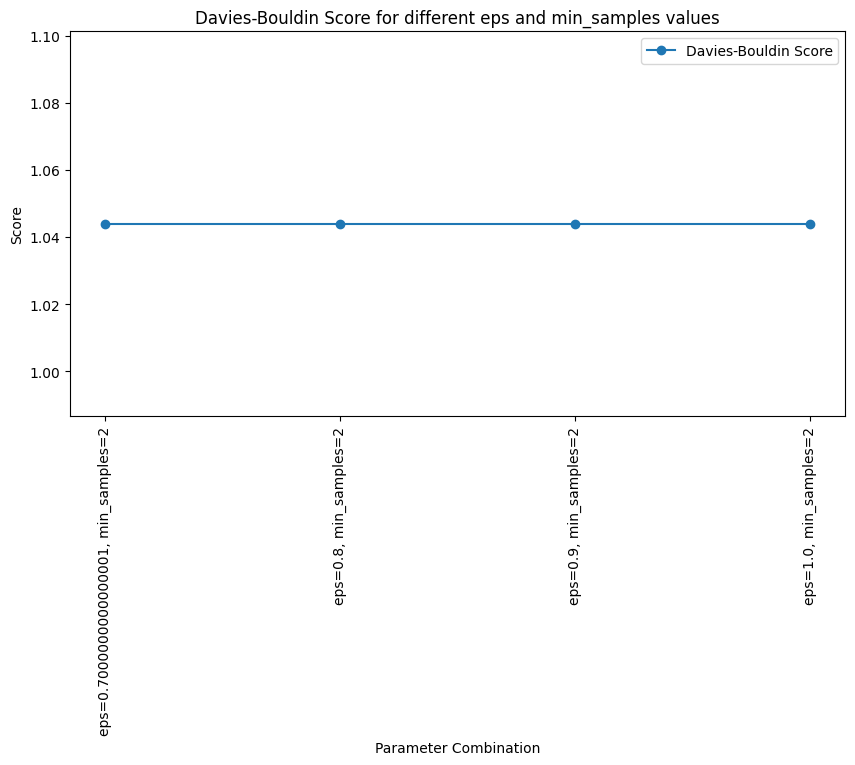

In [18]:
# Grid Search for DBSCAN

# Define the range of eps and min_samples values to test
eps_values = np.arange(0.1, 1.1, 0.1)
min_samples_values = range(2, 11)

# Initialize lists to store the silhouette and Davies-Bouldin scores
silhouette_scores_dbscan = []
davies_bouldin_scores_dbscan = []

# Loop over the range of eps and min_samples values
for eps in eps_values:
    for min_samples in min_samples_values:
        # Apply DBSCAN clustering
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(scaled_data)
        
        # Predict the cluster labels
        cluster_labels = dbscan.labels_
        
        # Check if there are at least 2 clusters
        if len(set(cluster_labels)) > 1:
            # Calculate the silhouette score
            silhouette_avg = silhouette_score(scaled_data, cluster_labels)
            silhouette_scores_dbscan.append((eps, min_samples, silhouette_avg))
            
            # Calculate the Davies-Bouldin score
            davies_bouldin_avg = davies_bouldin_score(scaled_data, cluster_labels)
            davies_bouldin_scores_dbscan.append((eps, min_samples, davies_bouldin_avg))

# Display the silhouette and Davies-Bouldin scores
print("Silhouette Scores for different eps and min_samples values:", silhouette_scores_dbscan)
print("Davies-Bouldin Scores for different eps and min_samples values:", davies_bouldin_scores_dbscan)

# Find the best parameters based on silhouette score
best_silhouette_score = max(silhouette_scores_dbscan, key=lambda x: x[2])
print("Best Silhouette Score:", best_silhouette_score)

# Find the best parameters based on Davies-Bouldin score
best_davies_bouldin_score = min(davies_bouldin_scores_dbscan, key=lambda x: x[2])
print("Best Davies-Bouldin Score:", best_davies_bouldin_score)

# Plot the silhouette scores
plt.figure(figsize=(10, 5))
plt.plot([f"eps={eps}, min_samples={min_samples}" for eps, min_samples, _ in silhouette_scores_dbscan], 
         [score for _, _, score in silhouette_scores_dbscan], marker='o', label='Silhouette Score')
plt.xlabel('Parameter Combination')
plt.ylabel('Score')
plt.title('Silhouette Score for different eps and min_samples values')
plt.xticks(rotation=90)
plt.legend()
plt.show()

# Plot the Davies-Bouldin scores
plt.figure(figsize=(10, 5))
plt.plot([f"eps={eps}, min_samples={min_samples}" for eps, min_samples, _ in davies_bouldin_scores_dbscan], 
         [score for _, _, score in davies_bouldin_scores_dbscan], marker='o', label='Davies-Bouldin Score')
plt.xlabel('Parameter Combination')
plt.ylabel('Score')
plt.title('Davies-Bouldin Score for different eps and min_samples values')
plt.xticks(rotation=90)
plt.legend()
plt.show()

# Bar Plot for k-Means Scores
Visualize the silhouette and Davies-Bouldin scores for different k values using bar plots.

Silhouette Scores for different k values: [np.float64(0.2979006513287418), np.float64(0.08335700846858159), np.float64(0.08511418494712017), np.float64(0.06359013087744256), np.float64(0.05920847409696965), np.float64(0.05578608957358554), np.float64(0.06854599158969583), np.float64(0.05616007345983939), np.float64(0.053002702299119464)]
Davies-Bouldin Scores for different k values: [np.float64(2.551572317982304), np.float64(2.797363780492549), np.float64(2.5556455421526527), np.float64(2.778195160746035), np.float64(2.7708628123156505), np.float64(2.885491294838552), np.float64(2.469812342382589), np.float64(2.7073741451648496), np.float64(2.7410461196474456)]


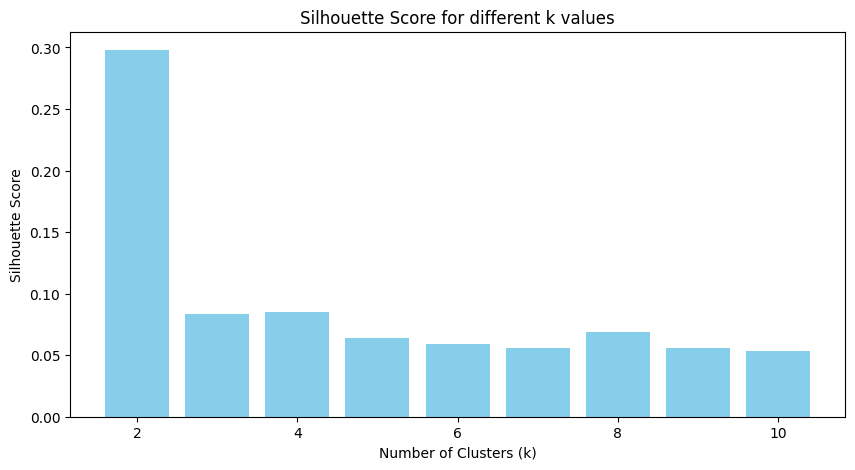

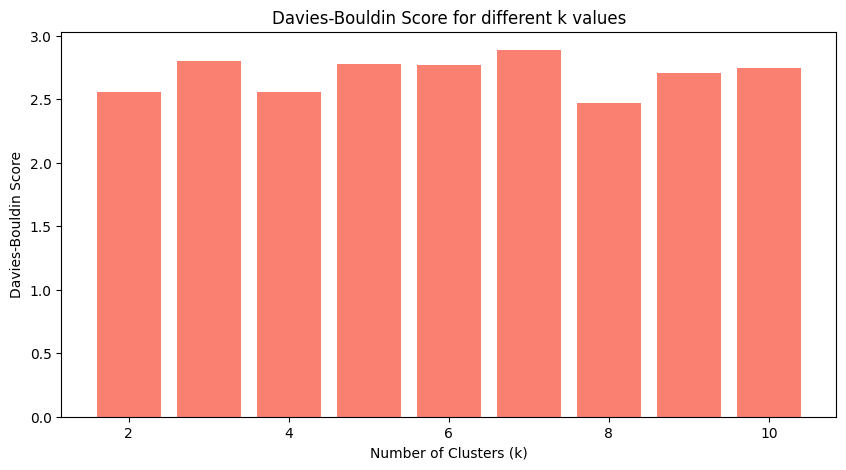

In [19]:
# Bar Plot for k-Means Scores

import matplotlib.pyplot as plt
import numpy as np

# Define the range of k values to test
k_values = range(2, 11)

# Initialize lists to store the silhouette and Davies-Bouldin scores
silhouette_scores = []
davies_bouldin_scores = []

# Loop over the range of k values
for k in k_values:
    # Apply k-Means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    
    # Predict the cluster labels
    cluster_labels = kmeans.labels_
    
    # Calculate the silhouette score
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
    # Calculate the Davies-Bouldin score
    davies_bouldin_avg = davies_bouldin_score(scaled_data, cluster_labels)
    davies_bouldin_scores.append(davies_bouldin_avg)

# Display the silhouette and Davies-Bouldin scores
print("Silhouette Scores for different k values:", silhouette_scores)
print("Davies-Bouldin Scores for different k values:", davies_bouldin_scores)

# Plot the silhouette scores
plt.figure(figsize=(10, 5))
plt.bar(k_values, silhouette_scores, color='skyblue')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different k values')
plt.show()

# Plot the Davies-Bouldin scores
plt.figure(figsize=(10, 5))
plt.bar(k_values, davies_bouldin_scores, color='salmon')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Score')
plt.title('Davies-Bouldin Score for different k values')
plt.show()

# Line Plot for DBSCAN Scores
Visualize the silhouette and Davies-Bouldin scores for different values of eps and min_samples using line plots.

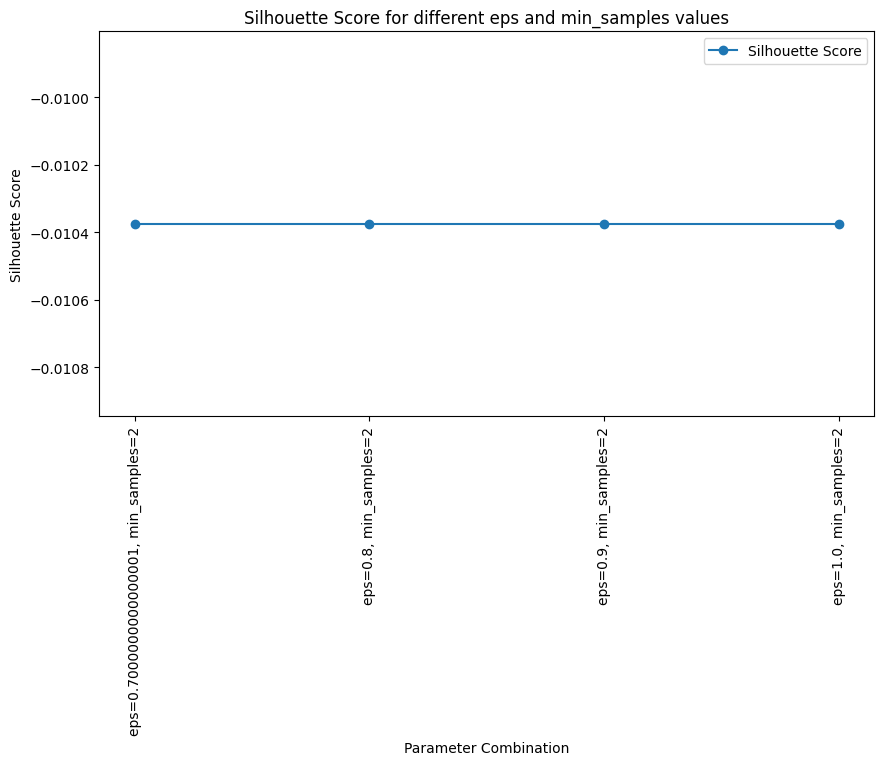

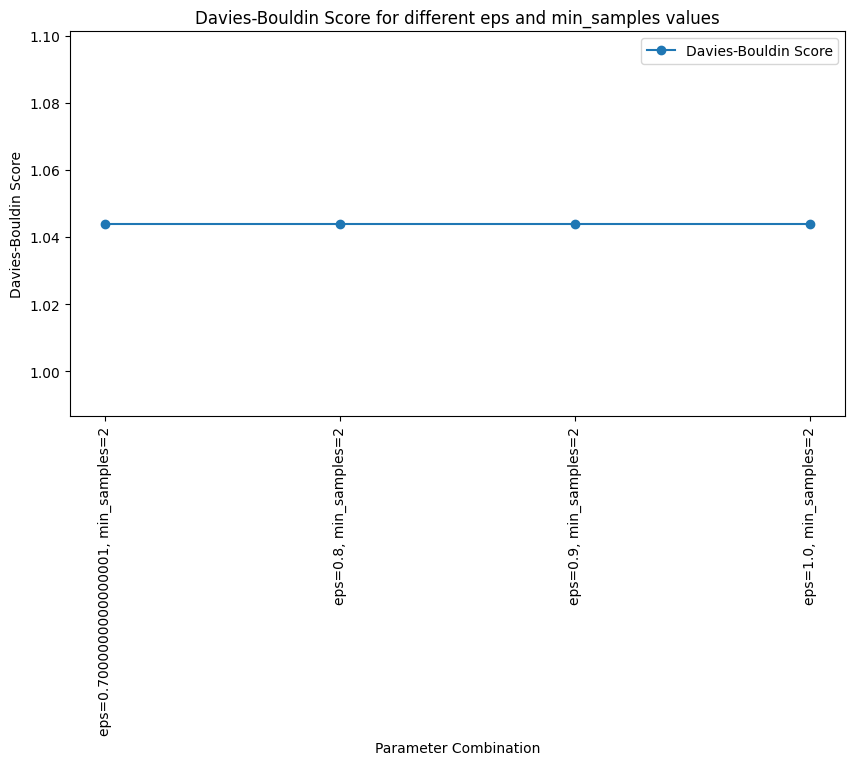

In [20]:
# Line Plot for DBSCAN Scores

# Extract eps, min_samples, and scores for plotting
eps_values = [eps for eps, min_samples, score in silhouette_scores_dbscan]
min_samples_values = [min_samples for eps, min_samples, score in silhouette_scores_dbscan]
silhouette_scores = [score for eps, min_samples, score in silhouette_scores_dbscan]
davies_bouldin_scores = [score for eps, min_samples, score in davies_bouldin_scores_dbscan]

# Plot the silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(range(len(silhouette_scores)), silhouette_scores, marker='o', label='Silhouette Score')
plt.xticks(range(len(silhouette_scores)), [f"eps={eps}, min_samples={min_samples}" for eps, min_samples in zip(eps_values, min_samples_values)], rotation=90)
plt.xlabel('Parameter Combination')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different eps and min_samples values')
plt.legend()
plt.show()

# Plot the Davies-Bouldin scores
plt.figure(figsize=(10, 5))
plt.plot(range(len(davies_bouldin_scores)), davies_bouldin_scores, marker='o', label='Davies-Bouldin Score')
plt.xticks(range(len(davies_bouldin_scores)), [f"eps={eps}, min_samples={min_samples}" for eps, min_samples in zip(eps_values, min_samples_values)], rotation=90)
plt.xlabel('Parameter Combination')
plt.ylabel('Davies-Bouldin Score')
plt.title('Davies-Bouldin Score for different eps and min_samples values')
plt.legend()
plt.show()